In [1]:
import matplotlib.pyplot as plt
import numpy as np

import scienceplots
plt.style.use('science')

# FONTS
import sys
from os.path import abspath
source_path = abspath('..')
if not source_path in sys.path:
    sys.path.append(source_path)
from font import SETTINGS
for key in SETTINGS:
    plt.rc(key, **SETTINGS[key])

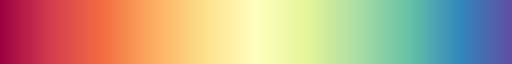

In [2]:
_cmap = plt.get_cmap('Spectral')
_cmap

In [3]:
cmap = _cmap(np.linspace(1, 0, 10)) # start with blue, end with red
len(cmap)

10

In [4]:
COLOR = plt.rcParams['axes.prop_cycle']
COLOR = [v for elem in list(COLOR) for _, v in elem.items()]
COLOR

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

# START

In [5]:
FIGURE_FORMAT = 'pdf'
# FIGURE_FORMAT = 'png'

# 1. z-loss

In [6]:
def create_figure_zloss(save_as=''):
    
    _, ax = plt.subplots(1, 1, figsize=(4,4))
    ax = [ax, None]

    x = np.linspace(0, 10, 100)
    y = np.log(x)**2
    ax[0].plot(x, [0 for _ in x], linestyle=':', marker='', color=COLOR[4])  # horizontal line
    ax[0].plot([1, 1], [-0.2, 6], linestyle=':', marker='', color=COLOR[5])  # vertical line
    ax[0].plot(x, y, linestyle='-', linewidth=2, marker='', color=COLOR[0])
    ax[0].set_ylabel(r'$\log^2(Z)$')
    ax[0].set_xlabel(r'$Z$')
    
    if len(save_as):
        assert save_as.endswith('.pdf') or save_as.endswith('.png')
        fig_path = f'figs/{save_as}'
        plt.savefig(fig_path, format=save_as[-3:], bbox_inches='tight')
        print(f'> saved as {fig_path}')

/scratch_local/ipykernel_1390054/2709173662.py:7: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)**2


> saved as figs/zloss.pdf


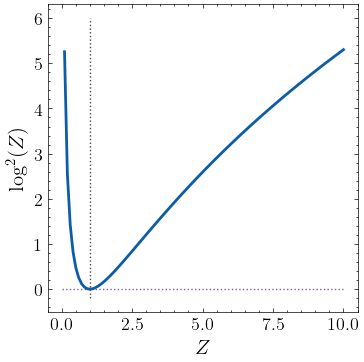

In [7]:
create_figure_zloss(save_as=f'zloss.{FIGURE_FORMAT}')

# 2. OEC

In [8]:
def create_figure_oec(save_as=''):

    np.random.seed(666)

    COLOR_MEAN = COLOR[4]
    
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    ax = [ax, None]

    MU = [2, 3]
    SCALE = 0.5
    LIM = 6
    N = 100
    
    random_data = MU + SCALE * np.random.normal(size=(N,2))
    x = random_data[:,0]
    y = random_data[:,1]

    x_centered = x - MU[0]
    y_centered = y - MU[1]
    ax[0].plot([-LIM, LIM], [0, 0], marker='', linestyle='--', color=COLOR[-1])
    ax[0].plot([0, 0], [-LIM, LIM], marker='', linestyle='--', color=COLOR[-1])
    ax[0].plot(x, y, marker='.', linestyle='', color=COLOR[3], label=r'Before $\mu$-centering')
    ax[0].plot(x_centered, y_centered, marker='.', linestyle='', color=COLOR[1], label='After $\mu$-centering')
    ax[0].set_xlim([-6, 6])
    ax[0].set_ylim([-6, 6])
    ax[0].set_xlabel('hidden dimension 1')
    ax[0].set_ylabel('hidden dimension 2')
    _ = ax[0].legend(frameon=True, framealpha=1, edgecolor='none')
    _ = ax[0].annotate("", xytext=(0, 0), xy=(MU[0], MU[1]), arrowprops=dict(arrowstyle="->", linewidth=2, color=COLOR_MEAN))
    _ = ax[0].text(MU[0]-0.5, MU[1]-2, r'$\mu$', color=COLOR_MEAN)
    
    if len(save_as):
        assert save_as.endswith('.pdf') or save_as.endswith('.png')
        fig_path = f'figs/{save_as}'
        plt.savefig(fig_path, format=save_as[-3:], bbox_inches='tight')
        print(f'> saved as {fig_path}')

> saved as figs/oec.pdf


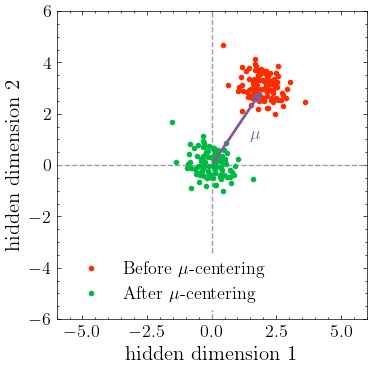

In [9]:
create_figure_oec(save_as=f'oec.{FIGURE_FORMAT}')